In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
mt5_small_edit_sims = np.load("./mt5-small_embedding_edit_dist_sims.npy", allow_pickle=True).item()

In [11]:
print(list(range(np.max(np.array(mt5_small_edit_sims["leven_dist"])) + 1)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [4]:
emb_sims = np.array(mt5_small_edit_sims["emb_sim"])
leven_dists = np.array(mt5_small_edit_sims["leven_dist"])

leven_dist_x = list(range(np.max(leven_dists) + 1))
avg_cos_sim_y = []
for i in tqdm(leven_dist_x):
    avg_cos_sim_y.append(np.mean(emb_sims[np.where(leven_dists == i)]))

print(avg_cos_sim_y)


  0%|          | 0/17 [00:00<?, ?it/s]

/mmfs1/gscratch/ark/knylund/.conda/envs/arkenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mmfs1/gscratch/ark/knylund/.conda/envs/arkenv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 17/17 [00:00<00:00, 58.90it/s]

[nan, 0.10669746, 0.07473579, 0.052688774, 0.03916733, 0.031123748, 0.012825748, 0.023352455, 0.020982053, 0.017383631, 0.015302709, 0.019289235, 0.01630477, 0.031511717, 0.02606745, 0.110439025, 0.02231465]


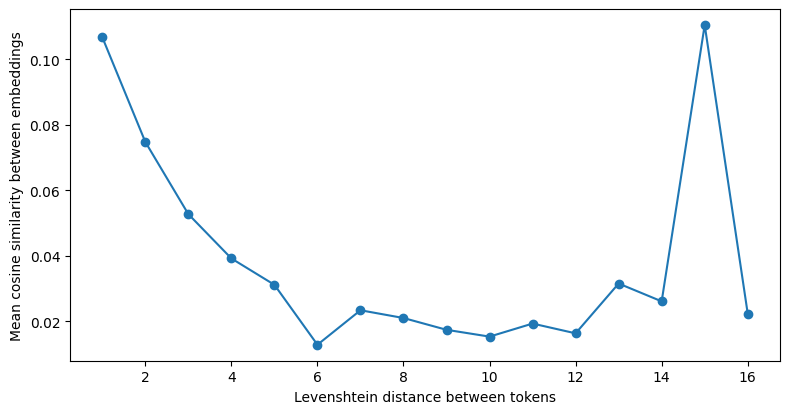

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.25))

ax.plot(leven_dist_x, avg_cos_sim_y, "-o")
ax.set_ylabel("Mean cosine similarity between embeddings")
ax.set_xlabel("Levenshtein distance between tokens")
plt.tight_layout()